**Done by - Utkarsh Tewari**  
**TASK 3 - Explore Unsupervised Machine Learning**

Analysing the iris dataset and predict the optimum number of clusters and represent it visually.

# step 1
**Importing the libraries**

In [1]:
#Importing the important libraries
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import datasets #inbuilt for loading the iris dataset

# step 2
**Load the Iris data set**

In [2]:
# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head(10) 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


# step 3
**Finding the optimum value for k or number of clusters**


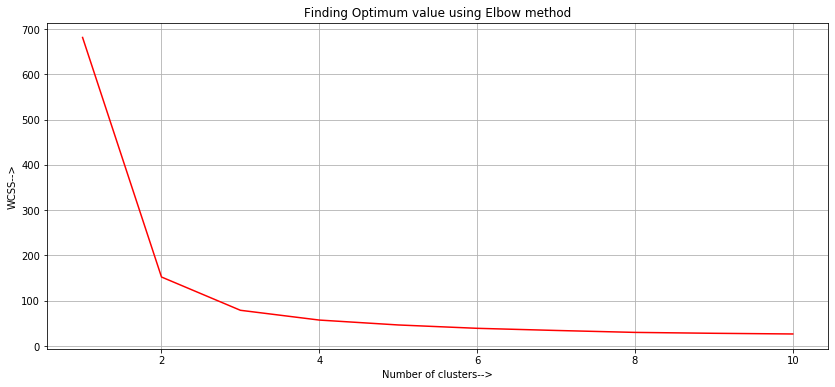

In [3]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values

#within cluster sum of squares
wcss = []

#standard code for implementing K-means clustering upto value 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    
    # calculates squared error for the clustered points 
    wcss.append(kmeans.inertia_)
    
#plot to view the elbow which will become our 'k'
plt.figure(figsize=(14,6))
plt.plot(range(1, 11), wcss,'r')
plt.title('Finding Optimum value using Elbow method')
plt.xlabel('Number of clusters-->')
plt.ylabel('WCSS-->')
plt.grid(True)


# the point of the elbow is the most optimal value for choosing k 

**From the above graph, it's visible that at k=3, we are getting the shape of an elbow and hence it is our required value of k**
Hence value of **k=3**

# step 4
**Applying K-means clustering and using k=3 in the dataset**

In [4]:
# Applying kmeans to the dataset and Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)

#fitting the data
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


# step 5
**Plotting the graph for the classifications that is predicted using K Means**

Text(0.5, 1.0, 'predicted graph using sepal length and width')

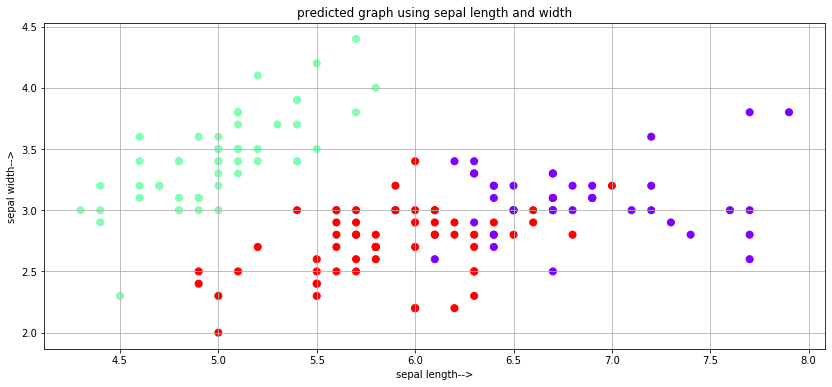

In [5]:
plt.figure(figsize=(14,6))
plt.scatter(x[:,0],x[:,1],c=y_kmeans,s=50,cmap = 'rainbow')
plt.grid(True)
plt.xlabel('sepal length-->')
plt.ylabel('sepal width-->')
plt.title('predicted graph using sepal length and width')

Text(0.5, 1.0, 'predicted graph using petal length and width')

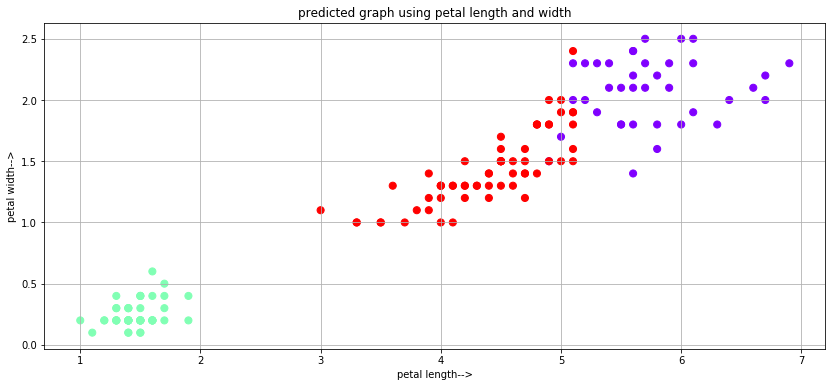

In [6]:
plt.figure(figsize=(14,6))
plt.scatter(x[:,2],x[:,3],c=y_kmeans,s=50,cmap = 'rainbow')
plt.grid(True)
plt.xlabel('petal length-->')
plt.ylabel('petal width-->')
plt.title('predicted graph using petal length and width')